In [20]:
import altair as alt
from vega_datasets import data
cars = data.cars()

cars.head()

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
0          12.0          8         307.0       130.0              18.0   
1          11.5          8         350.0       165.0              15.0   
2          11.0          8         318.0       150.0              18.0   
3          12.0          8         304.0       150.0              16.0   
4          10.5          8         302.0       140.0              17.0   

                        Name Origin  Weight_in_lbs       Year  
0  chevrolet chevelle malibu    USA           3504 1970-01-01  
1          buick skylark 320    USA           3693 1970-01-01  
2         plymouth satellite    USA           3436 1970-01-01  
3              amc rebel sst    USA           3433 1970-01-01  
4                ford torino    USA           3449 1970-01-01

## Altair Charts

- Create a `Chart` object
    - Specify _title, width, height, padding_ etc. 
    ---
- Choose a `mark`
    - pick the visual element for your chart from _point, area, line, bar_ etc.
        * ``mark_point()`` 
        * ``mark_circle()``
        * ``mark_square()``
        * ``mark_line()``
        * ``mark_area()``
        * ``mark_bar()``
        * ``mark_tick()``
    ---
- `encode` data to visual features 
    - eg. *x='col_1', y='col_2', color='col_3'* etc.
        * ``x``: x-axis value
        * ``y``: y-axis value
        * ``color``: color of the mark
        * ``opacity``: transparency/opacity of the mark
        * ``shape``: shape of the mark
        * ``size``: size of the mark
        * ``row``: row within a grid of facet plots
        * ``column``: column within a grid of facet plots
    - specify the _type_ to interpret data 
        - Q: quantitative, 
        - O: Ordinal, 
        - N: Nominal, 
        - T: temporal)
    - `x` and `y` can be constructed with `alt.X(), alt.Y(), alt.Bin()` etc
    - add _facetting_ using `row=, column=`
    ---
- add click-drag, pan, zoom to the chart with `.interactive()`    

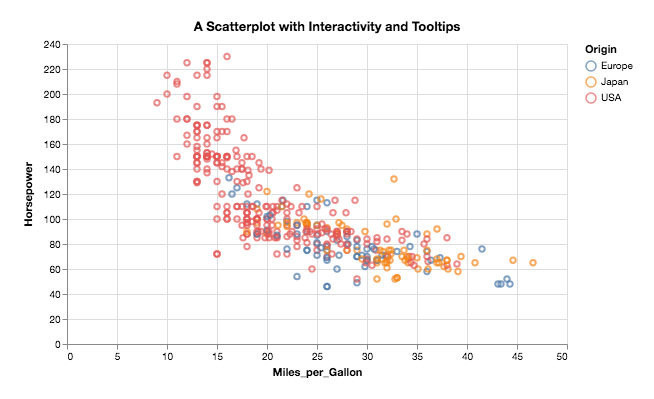

In [67]:
(alt
 .Chart(data=cars, 
        height=300, width=500, padding=20,
        title='A Scatterplot with Interactivity and Tooltips')
 .mark_point()
 .encode(x='Miles_per_Gallon:Q', y='Horsepower:Q',
         color='Origin:N', 
         tooltip='Name')
 .interactive()
)

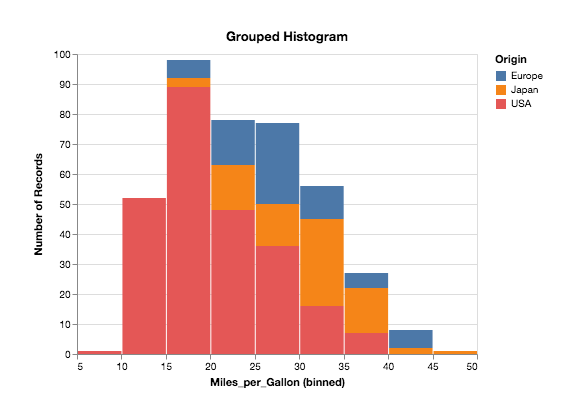

In [74]:
(alt
 .Chart(data=cars, title="Grouped Histogram", 
        width=400, height=300, padding=30)
 .mark_bar()
 .encode(x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=10)),
         y='count()',
         color='Origin')
)

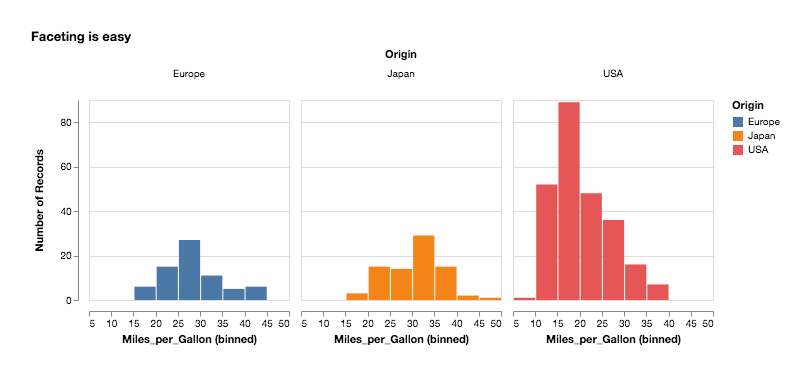

In [87]:
(alt
 .Chart(data=cars, title="Faceting is easy",
        width=200, height=200, padding=30)
 .mark_bar()
 .encode(x=alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=10)),
         y='count()',
         tooltip='count()',
         color='Origin',
         column='Origin')
)

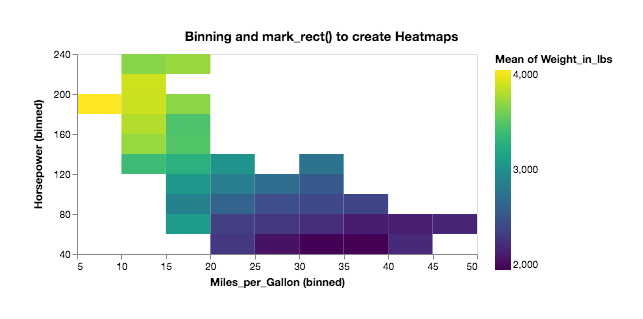

In [96]:
(alt
 .Chart(
     data=cars, 
     title='Binning and mark_rect() to create Heatmaps',
     width=400, 
     height=200, 
     padding=30)
 .mark_rect()
 .encode(
     x=alt.X('Miles_per_Gallon', bin=True),
     y=alt.Y('Horsepower', bin=True),
     color='mean(Weight_in_lbs)')
)

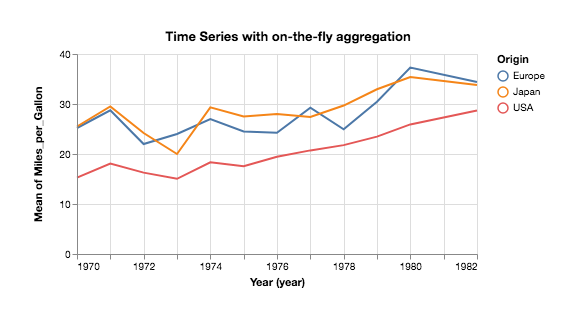

In [108]:
(alt
 .Chart(
     data=cars, 
     title='Time Series with on-the-fly aggregation',
     width=400, 
     height=200, 
     padding=30)
 .mark_line()
 .encode(
     x=alt.X('Year', timeUnit='year'),
     y='mean(Miles_per_Gallon)', 
     color='Origin'
))

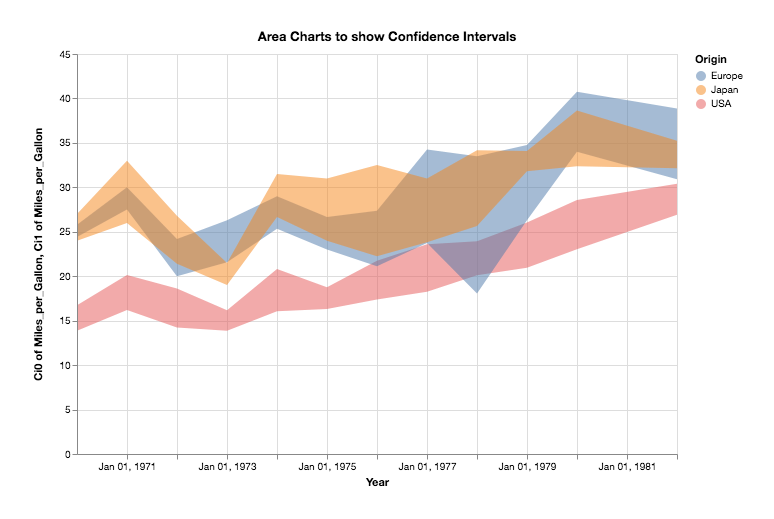

In [113]:
(alt
 .Chart(
     data=cars, 
     title='Area Charts to show Confidence Intervals',
     width=600, 
     height=400, 
     padding=30)
 .mark_area(opacity=0.5)
 .encode(
     x='Year',
     y='ci0(Miles_per_Gallon)',
     y2='ci1(Miles_per_Gallon)',
     color='Origin'
))

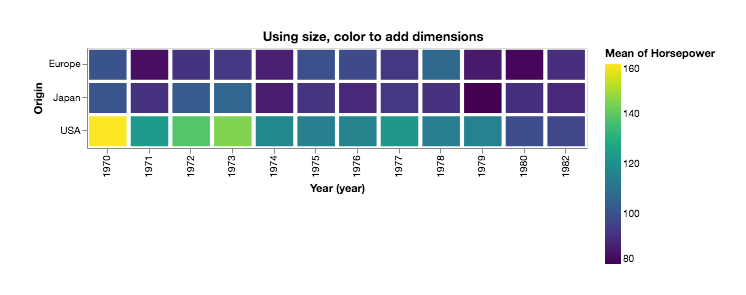

In [180]:
(alt
 .Chart(
     data=cars, 
     width=500, height=100, padding=30,
     title='Using size, color to add dimensions'
     
 )
 .mark_rect()
 .encode(
     x=alt.X('Year:O', timeUnit='year'),
     y='Origin',
     color='mean(Horsepower):Q',
     tooltip='count(Name):Q'
 )
)

---

# The $selection$ API

- allows `interval, single` or `multi` selections
    - by specifying ``encodings``, we can control whether the selection covers x, y, or both
    - `selection_single()` allows the user to click on single objects to select them, one at a time
- First, create a selection object with `alt.selection_*()`
    - The `empty` argument lets us control whether empty selections contain all values, or none of the values
- Then, pass it to the Chart through its `.properties()` method
- Use the selection with `alt.condition()` to power interactivity
    - The ``alt.condition`` function takes three arguments: 
        - a selection object, 
        - a value to be applied to points within the selection, and 
        - a value to be applied to points outside the selection.
- it automatically applies across any compound charts

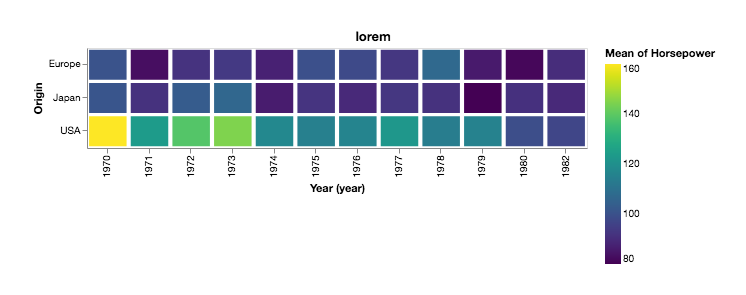

In [189]:
single = alt.selection_single(on='click')

(alt
 .Chart(
     data=cars, 
     width=500, height=100, padding=30,
     title='lorem')
 .mark_rect()
 .encode(
     x=alt.X('Year:O', timeUnit='year'),
     y='Origin',
     color=alt.condition(single, 'mean(Horsepower):Q', alt.value('lightgray')))
 .properties(
     selection=single)
)

In [190]:
weather = data.seattle_weather()
weather.head()

date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain
2 2012-01-03            0.8      11.7       7.2   2.3     rain
3 2012-01-04           20.3      12.2       5.6   4.7     rain
4 2012-01-05            1.3       8.9       2.8   6.1     rain

---
## Selections to color stuff

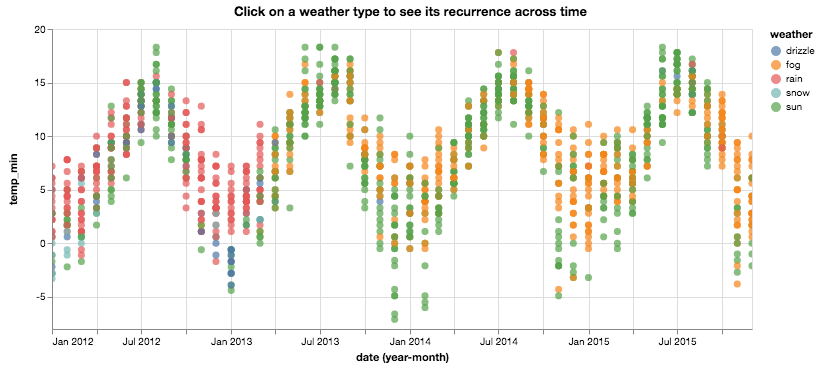

In [297]:
sel = alt.selection_single(encodings=['color'], empty='all')

base = \
(alt
 .Chart(data=weather, width=700, title='Click on a weather type to see its recurrence across time')
 .mark_circle(size=50)
 .encode(
     x=alt.X('date:T', timeUnit='yearmonth'),
     y='temp_min:Q',
     y2='temp_max:Q',
     color=alt.condition(sel, 'weather:N', alt.value('lightgray')),
     tooltip=alt.condition(sel, 'weather:N', alt.value(''))
 )
 .properties(selection=sel)
 .interactive()
)

base

---
### Using Selections to control the x-domain of a View

- First we create and bind two charts
- Create an interval selection object
- Assign it to the Master using `properties`
- Make the Slave respond to it using `encode`

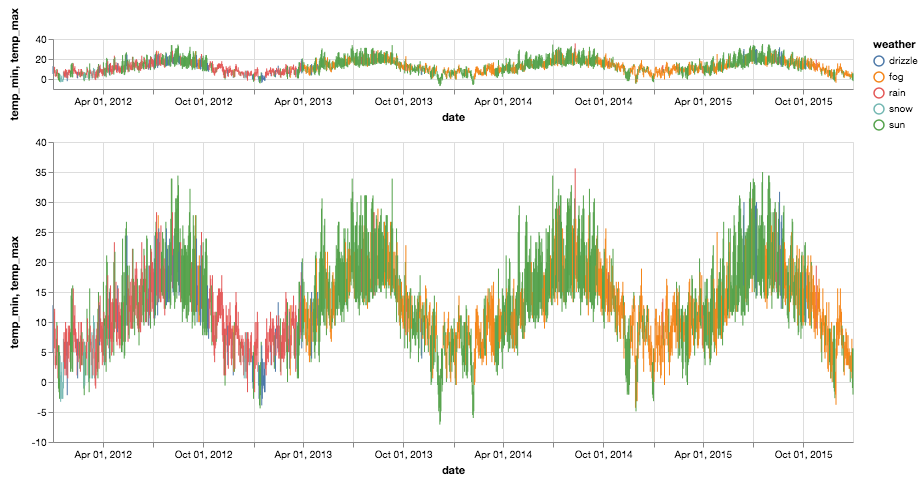

In [208]:
base = \
(alt
 .Chart(data=weather)
 .mark_rule()
 .encode(
     x='date:T',
     y='temp_min:Q',
     y2='temp_max:Q',
     color='weather:N'
 )
)

master = base.properties(width=800, height=50)
slave = base.properties(width=800, height=300)


master & slave

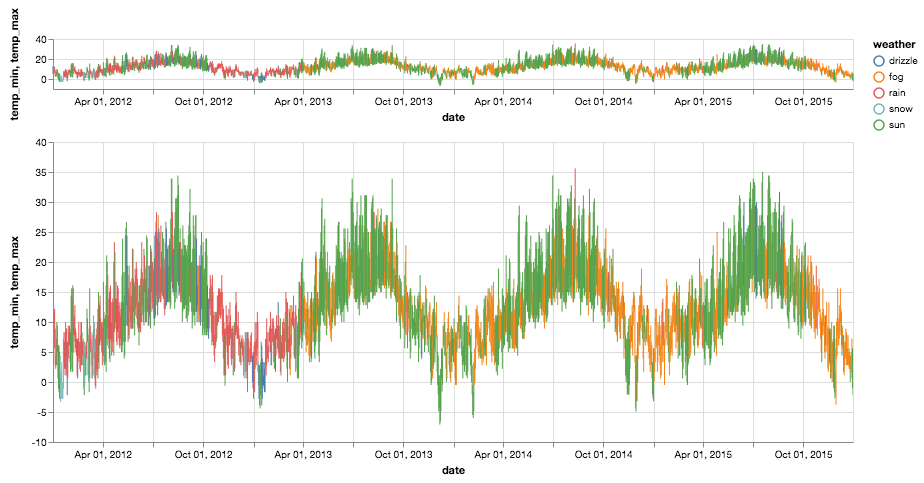

In [209]:
interval = alt.selection_interval(encodings=['x'])

# Select from Master
master = master.properties(selection=interval)

# Apply to Slave
slave = slave.encode(x=alt.X('date:T', scale=alt.Scale(domain=interval.ref())))

master & slave

---
## Using Selections to filter data

### 1. Click

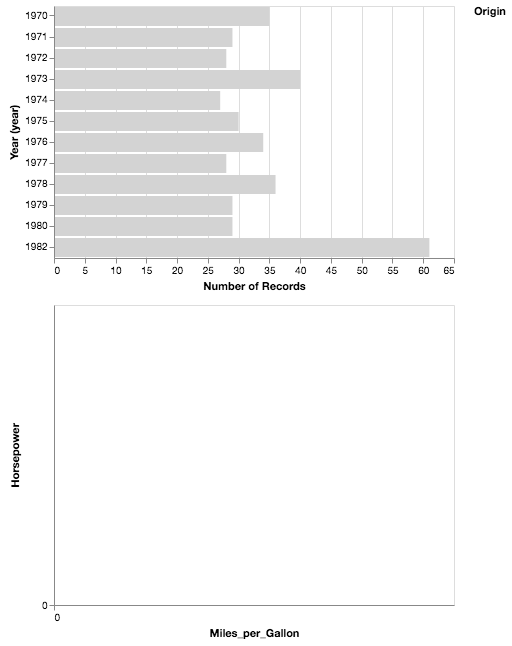

In [273]:
single = alt.selection_multi(encodings=['y'], empty='none')

master = \
(alt
 .Chart(data=cars)
 .mark_bar()
 .encode(
     x='count()',
     y=alt.Y('Year:N', timeUnit='year'),
     color=alt.condition(single, alt.value('steelblue'), alt.value('lightgray'))
 )
 .properties(selection=single)
)

slave = \
(alt
 .Chart(data=cars)
 .mark_point()
 .encode(
     x='Miles_per_Gallon:Q',
     y='Horsepower:Q',
     color='Origin:N'
 )
 .transform_filter(single)
)

master & slave

### 2. Interval

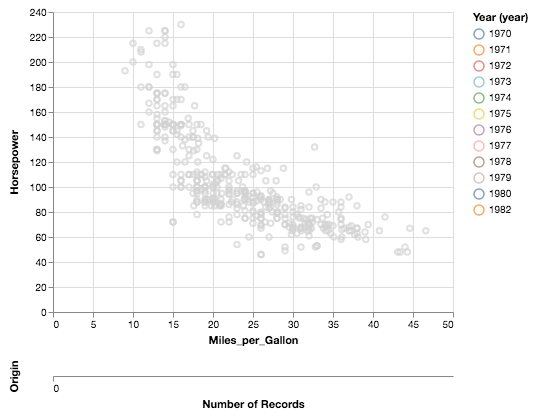

In [271]:
sel = alt.selection_interval(encodings=['x'], empty='none')

master = \
(alt
 .Chart(data=cars)
 .mark_point()
 .encode(
     x='Miles_per_Gallon:Q',
     y='Horsepower:Q',
     color=alt.condition(sel, 
                         alt.Color('Year:N', timeUnit='year'), 
                         alt.value('lightgray'))
 )
 .properties(selection=sel)
)

slave = \
(alt
 .Chart(data=cars)
 .mark_bar()
 .encode(
     x='count()',
     y='Origin'
 )
 .transform_filter(sel)
)


master & slave

--- 
## 2 Distinct y-Axes

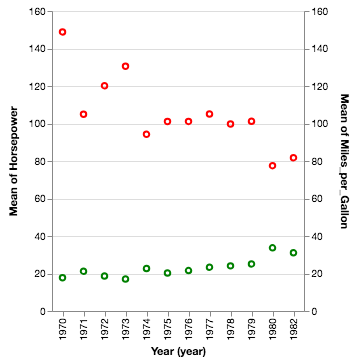

In [269]:
base = alt.Chart(cars).mark_point().encode(alt.X('Year:N', timeUnit='year'))

alt.layer(base.encode(y='mean(Horsepower)', 
                      color=alt.value('red'),
                     tooltip=alt.value('Horsepower')), 
          base.encode(y='mean(Miles_per_Gallon)',
                     color=alt.value('green'),
                     tooltip=alt.value('MPG'))
         ).resolve_axis(y='independent')